In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Load the data
df = pd.read_csv("/Users/ryanscholte/Desktop/GitHub/HW4/data/output/final_ma_data.csv")

/var/folders/mn/l2nrwsxn24g6ywz6ygh2fxp40000gn/T/ipykernel_28036/3444831010.py:9: DtypeWarning: Columns (68,98,99,100,101,102,103,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/ryanscholte/Desktop/GitHub/HW4/data/output/final_ma_data.csv")


In [225]:
df.head()

,contractid,planid,org_type,plan_type,partd,snp,eghp,org_name,org_marketing_name,plan_name,...,risk_star5,risk_star45,risk_star4,risk_star35,risk_star3,risk_star25,risk_bonus5,risk_bonus35,risk_bonus0,ma_rate
0,H0084,1.0,Local CCP,Local PPO,Yes,No,No,CARE IMPROVEMENT PLUS OF TEXAS INSURANCE COMPANY,Care Improvement Plus,Care Improvement Plus Medicare Advantage (PPO),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,953.76
1,H0084,1.0,Local CCP,Local PPO,Yes,No,No,CARE IMPROVEMENT PLUS OF TEXAS INSURANCE COMPANY,Care Improvement Plus,Care Improvement Plus Medicare Advantage (PPO),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,895.64
2,H0084,1.0,Local CCP,Local PPO,Yes,No,No,CARE IMPROVEMENT PLUS OF TEXAS INSURANCE COMPANY,Care Improvement Plus,Care Improvement Plus Medicare Advantage (PPO),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,941.69
3,H0084,1.0,Local CCP,Local PPO,Yes,No,No,CARE IMPROVEMENT PLUS OF TEXAS INSURANCE COMPANY,Care Improvement Plus,Care Improvement Plus Medicare Advantage (PPO),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1073.64
4,H0084,1.0,Local CCP,Local PPO,Yes,No,No,CARE IMPROVEMENT PLUS OF TEXAS INSURANCE COMPANY,Care Improvement Plus,Care Improvement Plus Medicare Advantage (PPO),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,942.86


In [226]:
#select only no in 'snp'
df = df[df['snp'] == 'No']

#remove all plans with a plan id from 800-899 inclusive
df = df[~df['planid'].between(800, 899)]


<Figure size 1200x600 with 0 Axes>

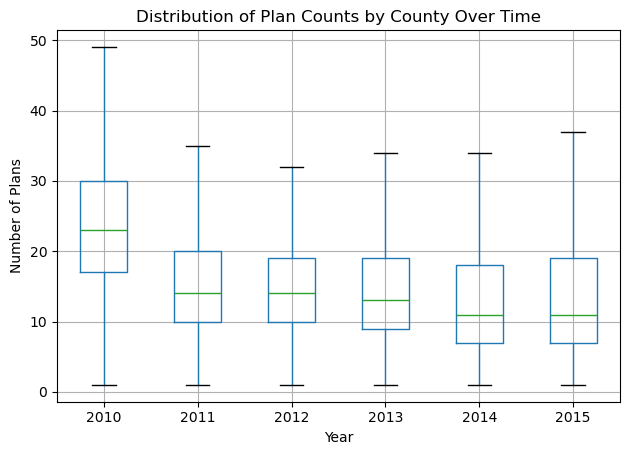

In [227]:
#Q1
# Group by year and county to count number of plans
plan_counts = (
    df.groupby(['year', 'fips'])
    .size()
    .reset_index(name='plan_count')
)

# Plot a box and whisker plot of plan counts by year

# only plot counts from 0-50 ignore outliers
plan_counts = plan_counts[plan_counts['plan_count'] <= 50]

plt.figure(figsize=(12, 6))
plan_counts.boxplot(column='plan_count', by='year', showfliers=False)
plt.title('Distribution of Plan Counts by County Over Time')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Number of Plans')
plt.grid(True)
plt.tight_layout()
plt.show()

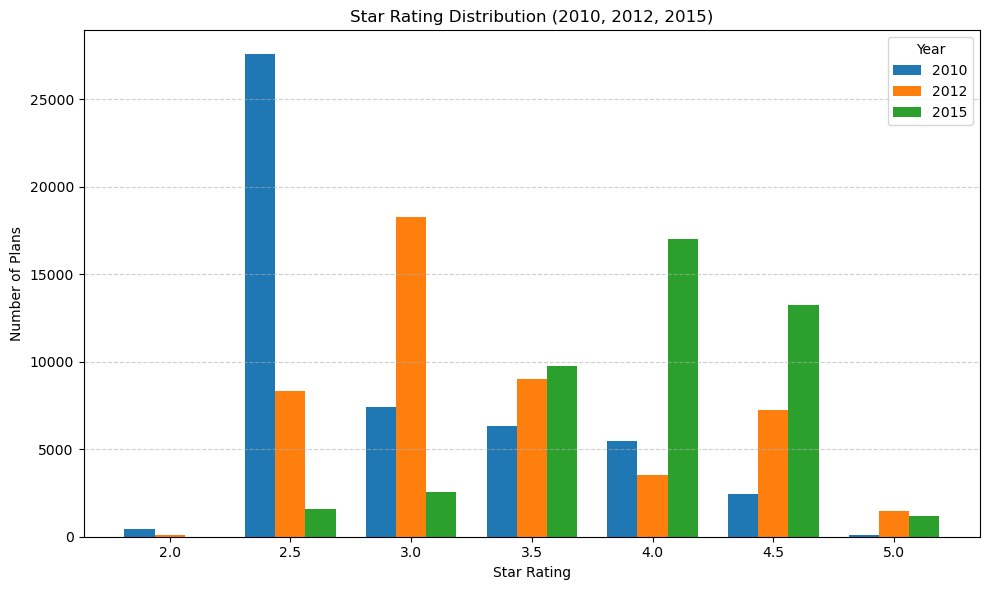

In [228]:
# #Q2

df2=df.copy()

#print head 
df2.head()
# Filter to relevant years
df_filtered = df2[df2['year'].isin([2010, 2012, 2015])]

# Group and reshape to get counts per year/star_rating
star_counts = (
    df_filtered.groupby(['Star_Rating', 'year'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# Ensure consistent order
star_ratings = sorted(star_counts.index)

# Plot setup
x = np.arange(len(star_ratings))  # positions for each star rating
width = 0.25  # width of each bar

plt.figure(figsize=(10, 6))

# Bars for each year
plt.bar(x - width, star_counts[2010], width=width, label='2010')
plt.bar(x,         star_counts[2012], width=width, label='2012')
plt.bar(x + width, star_counts[2015], width=width, label='2015')

# Labels and formatting
plt.xticks(x, star_ratings)  # categorical star rating labels
plt.xlabel('Star Rating')
plt.ylabel('Number of Plans')
plt.title('Star Rating Distribution (2010, 2012, 2015)')
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


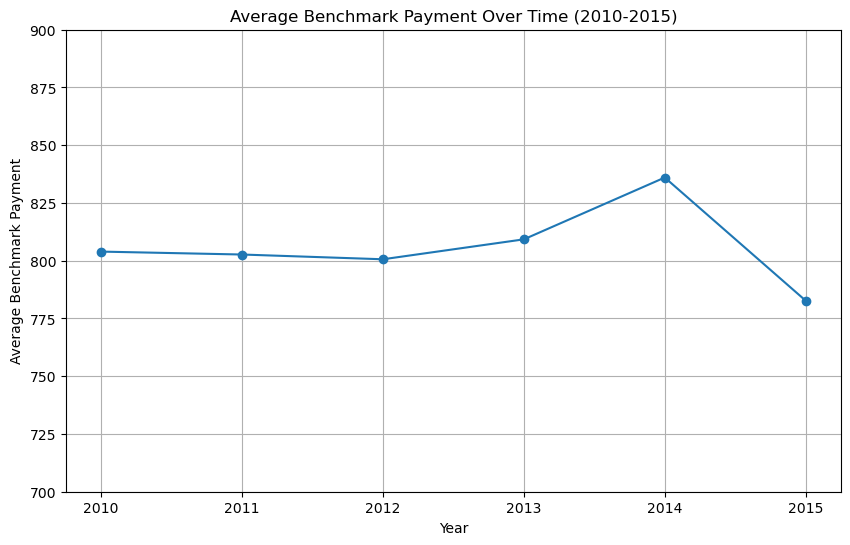

The average benchmark payment rose by $-21.24 from 2010 to 2015.


In [229]:
#Q3

# Calculate the average benchmark payment for each year
average_benchmark_payment = df.groupby('year')['ma_rate'].mean().reset_index()

# Plot the average benchmark payment over time

plt.figure(figsize=(10, 6))
#adjust the y-axis to show show range 700-900
plt.ylim(700, 900)
plt.plot(average_benchmark_payment['year'], average_benchmark_payment['ma_rate'], marker='o')
plt.title('Average Benchmark Payment Over Time (2010-2015)')
plt.xlabel('Year')
plt.ylabel('Average Benchmark Payment')
plt.grid(True)
plt.show()

# Calculate the rise in the average benchmark payment from 2010 to 2015
benchmark_2010 = average_benchmark_payment[average_benchmark_payment['year'] == 2010]['ma_rate'].values[0]
benchmark_2015 = average_benchmark_payment[average_benchmark_payment['year'] == 2015]['ma_rate'].values[0]
rise = benchmark_2015 - benchmark_2010
print(f"The average benchmark payment rose by ${rise:.2f} from 2010 to 2015.")



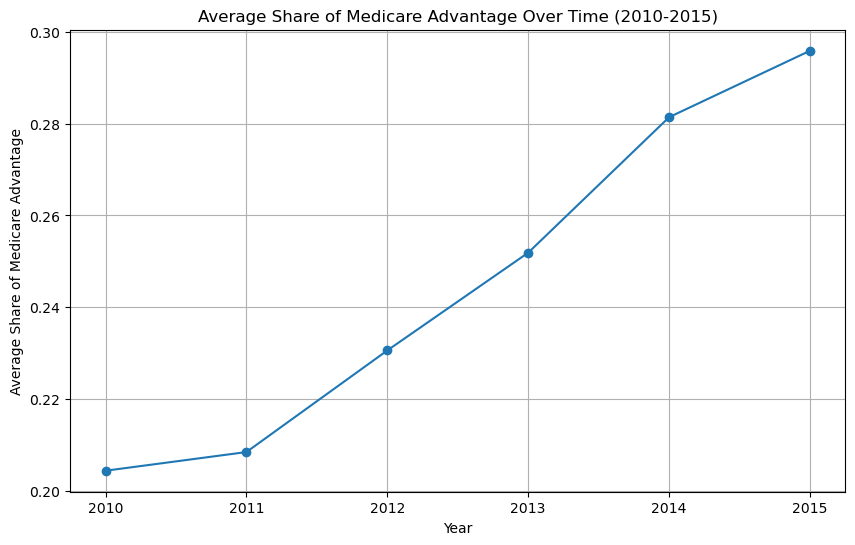

In [230]:
#Q4

df3=df.copy()

# Calculate the average share of Medicare Advantage for each year
df3['ma_share'] = df3['avg_enrolled'] / df3['avg_eligibles']
df3 = df3.groupby('year')['ma_share'].mean().reset_index()

# Plot the average share of Medicare Advantage over time
plt.figure(figsize=(10, 6))
plt.plot(df3['year'], df3['ma_share'], marker='o')
plt.title('Average Share of Medicare Advantage Over Time (2010-2015)')
plt.xlabel('Year')
plt.ylabel('Average Share of Medicare Advantage')
plt.grid(True)
plt.show()


In [231]:
#Q5

# Filter for 2010
df_2010 = df[df['year'] == 2010]

# List of variables used in the raw_rating calculation
rating_vars = [
    "breastcancer_screen", "rectalcancer_screen", "cv_cholscreen", "diabetes_cholscreen",
    "glaucoma_test", "monitoring", "flu_vaccine", "pn_vaccine", "physical_health",
    "mental_health", "osteo_test", "physical_monitor", "primaryaccess",
    "hospital_followup", "depression_followup", "nodelays", "carequickly",
    "overallrating_care", "overallrating_plan", "calltime",
    "doctor_communicate", "customer_service", "osteo_manage",
    "diabetes_eye", "diabetes_kidney", "diabetes_bloodsugar",
    "diabetes_chol", "antidepressant", "bloodpressure", "ra_manage",
    "copd_test", "betablocker", "bladder", "falling", "appeals_timely", "appeals_review"
]

# Compute raw_rating as the row-wise mean 
df_2010["raw_rating"] = df_2010[rating_vars].mean(axis=1, skipna=True)

columns_to_keep = [
    "contractid", "planid", "fips", "avg_enrollment", "state", "county", "raw_rating",
    "partc_score", "avg_eligibles", "avg_enrolled",  "risk_ab",
    "Star_Rating",  "ma_rate", "plan_type", "partd"
]

# missing for some reason "premium_partc","bid", "avg_ffscost",

df_2010 = df_2010.dropna(subset=['raw_rating', 'Star_Rating', 'avg_enrolled', 'avg_eligibles', 'partc_score', 'ma_rate'])

# Subset the dataframe
df_2010 = df_2010[columns_to_keep]

# Create rounded bins similar to the R logic
df_2010["rounded_30"] = np.where(
    (df_2010["raw_rating"] >= 2.75) & 
    (df_2010["raw_rating"] < 3.00) & 
    (df_2010["Star_Rating"] == 3.0), 1, 0)

df_2010["rounded_35"] = np.where(
    (df_2010["raw_rating"] >= 3.25) & 
    (df_2010["raw_rating"] < 3.50) & 
    (df_2010["Star_Rating"] == 3.5), 1, 0)

df_2010["rounded_40"] = np.where(
    (df_2010["raw_rating"] >= 3.75) & 
    (df_2010["raw_rating"] < 4.00) & 
    (df_2010["Star_Rating"] == 4.0), 1, 0)

df_2010["rounded_45"] = np.where(
    (df_2010["raw_rating"] >= 4.25) & 
    (df_2010["raw_rating"] < 4.50) & 
    (df_2010["Star_Rating"] == 4.5), 1, 0)

df_2010["rounded_50"] = np.where(
    (df_2010["raw_rating"] >= 4.75) & 
    (df_2010["raw_rating"] < 5.00) & 
    (df_2010["Star_Rating"] == 5.0), 1, 0)

# filter to only plantype "HMO"
df_2010_HMO = df_2010[df_2010["plan_type"] == "HMO/HMOPOS"]

# Filter for star ratings of interest and group by Star_Rating
rounded_summary = (
    df_2010_HMO[df_2010_HMO["Star_Rating"].isin([3.0, 3.5, 4.0, 4.5, 5.0])]
    .groupby("Star_Rating")
    .agg(
        count_30=("rounded_30", "sum"),
        count_35=("rounded_35", "sum"),
        count_40=("rounded_40", "sum"),
        count_45=("rounded_45", "sum"),
        count_50=("rounded_50", "sum")
    )
    .reset_index()
)

# Add a total column
rounded_summary["rounded"] = (
    rounded_summary["count_30"] +
    rounded_summary["count_35"] +
    rounded_summary["count_40"] +
    rounded_summary["count_45"] +
    rounded_summary["count_50"]
)

# Select relevant columns
rounded_summary = rounded_summary[["Star_Rating", "rounded"]]

# Display result
rounded_summary


/var/folders/mn/l2nrwsxn24g6ywz6ygh2fxp40000gn/T/ipykernel_28036/371882518.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010["raw_rating"] = df_2010[rating_vars].mean(axis=1, skipna=True)


,Star_Rating,rounded
0,3.0,2462
1,3.5,1667
2,4.0,65
3,4.5,0
4,5.0,0


In [232]:
import pandas as pd
import numpy as np
from pyfixest.estimation import feols

# Make sure market share is computed
df_2010['mktshare'] = df_2010['avg_enrolled'] / df_2010['avg_eligibles']

# RD AT 3-STAR CUTOFF (raw = 2.75)
df_2010['score_3'] = df_2010['raw_rating'] - 2.75
df_2010['treat_3'] = (df_2010['Star_Rating'] == 3.0).astype(int)
# df3_2010['score_treat_3'] = df3_2010['score_3'] * df3_2010['treat_3']

# Filter to within 0.125 bandwidth
df_bw_3 = df_2010[df_2010['score_3'].between(-0.125, 0.125)].copy()

# Estimate with pyfixest
model_3 = feols("mktshare ~ score_3 + treat_3", data=df3_bw_3)

# RD AT 3.5-STAR CUTOFF (raw = 3.25)

df_2010['score_35'] = df_2010['raw_rating'] - 3.25
df_2010['treat_35'] = (df_2010['Star_Rating'] == 3.5).astype(int)
# df3_2010['score_treat_35'] = df3_2010['score_35'] * df3_2010['treat_35']

# Filter to within 0.125 bandwidth
df_bw_35 = df_2010[df_2010['score_35'].between(-0.125, 0.125)].copy()

# Estimate with pyfixest
model_35 = feols("mktshare ~ score_35 + treat_35 ", data=df3_bw_35)

#model summaries
print(model_3.summary())
print(model_35.summary())


###

Estimation:  OLS
Dep. var.: mktshare, Fixed effects: 0
Inference:  iid
Observations:  1609

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| Intercept     |      0.262 |        0.022 |    11.814 |      0.000 |  0.219 |   0.306 |
| score_3       |      0.234 |        0.073 |     3.189 |      0.001 |  0.090 |   0.377 |
| treat_3       |     -0.012 |        0.023 |    -0.532 |      0.595 | -0.057 |   0.033 |
---
RMSE: 0.128 R2: 0.006 
None
###

Estimation:  OLS
Dep. var.: mktshare, Fixed effects: 0
Inference:  iid
Observations:  2013

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| Intercept     |      0.271 |        0.010 |    26.853 |      0.000 |  0.251 |   0.291 |
| score_35      |      0.456 |        0.052 |     8.82

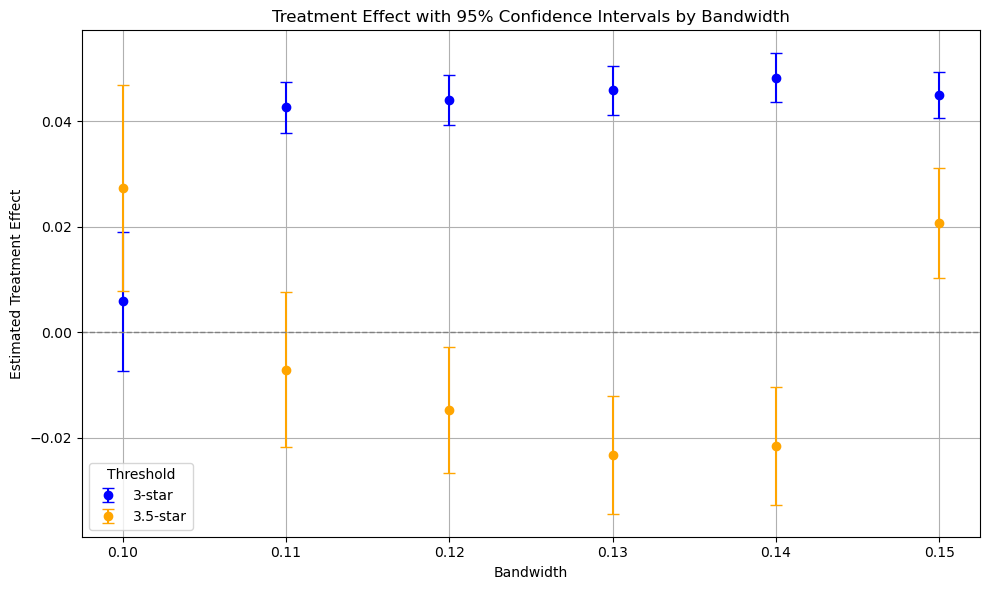

In [233]:


# Define bandwidths
bandwidths = [0.10, 0.11, 0.12, 0.13, 0.14, 0.15]
results = []

for bw in bandwidths:
    # --- 3-star ---
    bw_3 = df_2010[df_2010['score_3'].between(-bw, bw)]
    mod_3 = feols("mktshare ~ score_3 + treat_3", data=bw_3)
    coef_3 = mod_3.coef().get("treat_3", np.nan)
    se_3 = mod_3.se().get("treat_3", np.nan)

    # --- 3.5-star ---
    bw_35 = df_2010[df_2010['score_35'].between(-bw, bw)]
    mod_35 = feols("mktshare ~ score_35 + treat_35", data=bw_35)
    coef_35 = mod_35.coef().get("treat_35", np.nan)
    se_35 = mod_35.se().get("treat_35", np.nan)

    # Save all results
    results.append({
        "Bandwidth": bw,
        "Effect at 3-star": coef_3,
        "SE at 3-star": se_3,
        "Effect at 3.5-star": coef_35,
        "SE at 3.5-star": se_35
    })

# Convert to DataFrame
bandwidth_df = pd.DataFrame(results)

# --- Plotting with error bars ---
plt.figure(figsize=(10, 6))

# 3-star
plt.errorbar(
    bandwidth_df["Bandwidth"],
    bandwidth_df["Effect at 3-star"],
    yerr=1.96 * bandwidth_df["SE at 3-star"],
    fmt='o', label="3-star", capsize=4, color='blue'
)

# 3.5-star
plt.errorbar(
    bandwidth_df["Bandwidth"],
    bandwidth_df["Effect at 3.5-star"],
    yerr=1.96 * bandwidth_df["SE at 3.5-star"],
    fmt='o', label="3.5-star", capsize=4, color='orange'
)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Treatment Effect with 95% Confidence Intervals by Bandwidth")
plt.xlabel("Bandwidth")
plt.ylabel("Estimated Treatment Effect")
plt.legend(title="Threshold")
plt.grid(True)
plt.tight_layout()
plt.show()

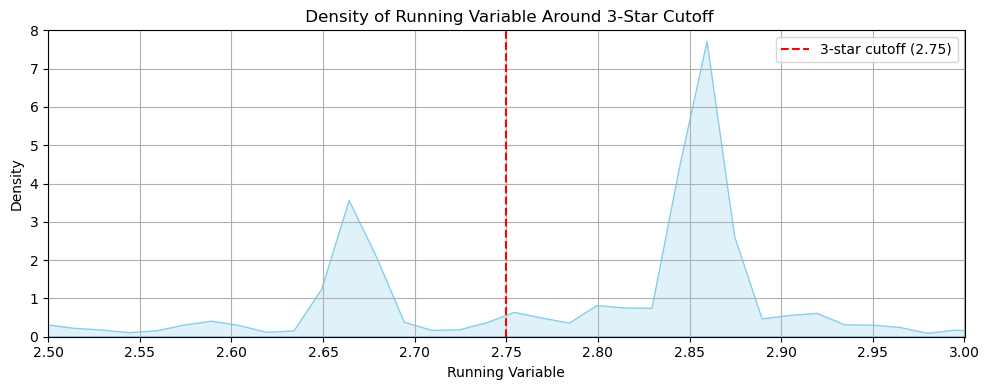

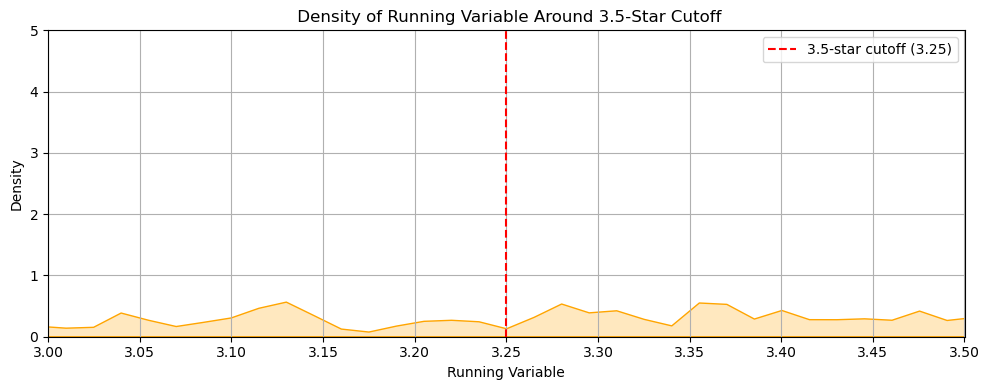

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

# KDE plot for 3-star cutoff (zoomed in)
plt.figure(figsize=(10, 4))
sns.kdeplot(df_2010['raw_rating'], bw_adjust=0.2, fill=True, color='skyblue')
plt.axvline(2.75, color='red', linestyle='--', label='3-star cutoff (2.75)')
plt.xlim(2.5, 3.0)
plt.xticks(np.arange(2.5, 3.05, 0.05))
plt.ylim(0, 8.0)
plt.title(" Density of Running Variable Around 3-Star Cutoff")
plt.xlabel("Running Variable")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# KDE plot for 3.5-star cutoff (zoomed in)
plt.figure(figsize=(10, 4))
sns.kdeplot(df_2010['raw_rating'], bw_adjust=0.2, fill=True, color='orange')
plt.axvline(3.25, color='red', linestyle='--', label='3.5-star cutoff (3.25)')
plt.xlim(3.0, 3.5)
plt.ylim(0, 5.0)
plt.xticks(np.arange(3.0, 3.55, 0.05))
plt.title(" Density of Running Variable Around 3.5-Star Cutoff")
plt.xlabel("Running Variable")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()